# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

Заказчик этого исследования — сеть отелей «Как в гостях».

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. 

В рамках данного проекта наши задачи:

* ознакомиться с данными;
* произвести предварительную обработку и исследовательский анализ данных;
* определить прибыль отеля;
* на основе данных и бизнес-задачи сформулировать задачу машинного обучения;
* обучить модели и выбрать лучшую из них;
* оценить прибыль на основе предсказаний обученной модели и сравнить с прибылью отеля. На разработку системы заложено 400000 рублей и она должна окупиться за год;
* определить признаки "ненадежного" клиента.

В выводах к проекту необходимо ответить на вопрос, целесообразно ли создание такой предсказательной системы для сети отелей.

### Шаг 1. Откройте файлы с данными

На данном этапе произведем открытие файлов и первичный анализ данных.

Для начала импортируем необходимые библиотеки для работы с данными и машинного обучения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
pd.options.display.float_format = '{:,.2f}'.format

Откроем файлы и выведем на экран основную информацию по ним.

In [2]:
try:
    data_train = pd.read_csv('/datasets/hotel_train.csv')
except:
    data_train = pd.read_csv('datasets/hotel_train.csv')
display(data_train.info())
display(data_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.00,2015,July,27,1,0,1,1.00,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.00,2015,July,27,1,0,2,2.00,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.00,2015,July,27,1,0,2,2.00,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.00,2015,July,27,1,0,2,2.00,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.00,2015,July,27,1,0,3,2.00,...,0,0,0,A,0,0,Transient,0,1,3


In [3]:
try:
    data_test = pd.read_csv('/datasets/hotel_test.csv')
except:
    data_test = pd.read_csv('datasets/hotel_test.csv')
display(data_test.info())
display(data_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,...,0,0,0,A,0,0,Transient,0,0,7


Тренировочная выборка содержит 65229 наблюдений. Пропусков данных нет.

Тестовая выборка содержит 32412 наблюдений. Пропусков данных также нет.

Далее выведем на экран распределение количественных и категориальных значений в тренировочной выборке методом describe.

In [4]:
data_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,"65,229.00",NaN,NaN,NaN,"43,544.07","25,614.86",0.00,"19,108.00","40,554.00","67,414.00","84,121.00"
is_canceled,"65,229.00",NaN,NaN,NaN,0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,"65,229.00",NaN,NaN,NaN,96.34,96.13,0.00,17.00,64.00,151.00,374.00
arrival_date_year,"65,229.00",NaN,NaN,NaN,"2,015.72",0.45,"2,015.00","2,015.00","2,016.00","2,016.00","2,016.00"
arrival_date_month,65229,12,October,9255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,"65,229.00",NaN,NaN,NaN,31.34,13.46,1.00,21.00,34.00,42.00,53.00
arrival_date_day_of_month,"65,229.00",NaN,NaN,NaN,15.85,8.75,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,"65,229.00",NaN,NaN,NaN,0.83,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,"65,229.00",NaN,NaN,NaN,2.22,1.35,0.00,1.00,2.00,3.00,6.00
adults,"65,229.00",NaN,NaN,NaN,1.84,0.48,0.00,2.00,2.00,2.00,4.00


In [5]:
data_test.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,"32,412.00",NaN,NaN,NaN,"60,131.51","29,953.59","6,086.00","45,291.75","53,394.50","89,800.25","97,903.00"
is_canceled,"32,412.00",NaN,NaN,NaN,0.39,0.49,0.00,0.00,0.00,1.00,1.00
lead_time,"32,412.00",NaN,NaN,NaN,97.59,86.51,0.00,23.00,76.00,155.00,373.00
arrival_date_year,"32,412.00",NaN,NaN,NaN,"2,017.00",0.00,"2,017.00","2,017.00","2,017.00","2,017.00","2,017.00"
arrival_date_month,32412,8,May,5262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,"32,412.00",NaN,NaN,NaN,17.80,9.18,1.00,10.00,18.00,25.00,35.00
arrival_date_day_of_month,"32,412.00",NaN,NaN,NaN,15.66,8.77,1.00,8.00,15.50,23.00,31.00
stays_in_weekend_nights,"32,412.00",NaN,NaN,NaN,0.87,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,"32,412.00",NaN,NaN,NaN,2.34,1.38,0.00,1.00,2.00,3.00,6.00
adults,"32,412.00",NaN,NaN,NaN,1.86,0.49,0.00,2.00,2.00,2.00,4.00


In [6]:
print('Количество явных дубликатов в обучающей выборке:', data_train.duplicated().sum())
print('Количество явных дубликатов в тестовой выборке:', data_test.duplicated().sum())

Количество явных дубликатов в обучающей выборке: 0
Количество явных дубликатов в тестовой выборке: 0


### Вывод

После открытия файлов видим, что в данных отсутствуют пропуски и явные дубликаты. В обучающей выборке предоставлены данные за 2015 и 2016 годы, а в тестовой- за 2017.

Из распределения количественных значений видим, что отменяют бронь номера около 40% клиентов. Это довольно много, поэтому следует рассмотреть возможности снижения данного показателя. Информация в тренировочной выборке дана за 2015 и 2016 год. Половина клиентов бронируют номера таким образом, чтобы хотя бы один из дней попал на выходной и в 75% случаев в номер заселяется пара без детей. В столбце, содержащем информацию о количестве младенцев в брони, видим максимальное значение 10. Данное значение похоже на выброс и следует вычислить, сколько таких значений встречается в столбце. Также следует рассмотреть на наличие выбросов признаки, содержащие информацию о количестве предыдущих отмен клиентом брони и о количестве неотмененных бронирований клиента. В этих признаках 75%-й квантиль содержит значение 0, а максимальные значения, соответственно- 26 и 58.

В категориальных значениях видим, что большинство клиентов приезжает из страны PRT (предположительно Португалии), а всего в данных представлены клиенты из 155 стран. Возможно, представители некоторых из них малочислены и их выборка нерепрезентативна. Это может повлиять на качество обучения модели, поэтому необходимо рассмотреть, как ведут себя представители разных стран и, возможно, объединить те страны, представителей которых в данных не более 1%. Также видим, что наиболее популярными опциями являются завтрак (BB), номер категории A, а заказчик не связан с договором или групповым заездом.

В описании к проекту не представлена расшифровка значений в признаке 'distribution_channel', поэтому следует вывести уникальные значения на экран и попытаться понять, что они обозначают.

### Шаг 2. Предобработка и исследовательский анализ данных

На данном этапе произведем исследовательский анализ данных, чтобы понять, отличаются ли клиенты, отменившие свою бронь, от клиентов, не отменивших ее. Для начала выведем на экран средние значения всех количественных характеристик в группах клиентов по признаку отмены брони.

In [7]:
data_train.groupby(by='is_canceled').mean()

,id,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,,,,,,,,,,,,,,,,,,
0,"48,278.59",72.24,"2,015.73",31.21,15.86,0.83,2.21,1.82,0.08,0.01,0.03,0.02,0.15,0.26,2.28,0.09,0.66,3.05
1,"35,434.30",137.62,"2,015.70",31.57,15.83,0.81,2.24,1.86,0.07,0.00,0.02,0.32,0.03,0.08,5.15,0.00,0.26,3.05


На данном этапе видим следующие различия в поведении клиентов:

* количество дней между датой бронирования и приезда у клиентов, отменивших свою бронь, в два раза больше, чем у заселившихся клиентов. Если наше предположение о том, что PRT в стране приезда означает Португалию, то большинство клиентов из этой страны, скорее всего, означает, что сеть отелей располагается по большей части в Португалии, а для приезда в нее из стран, не входящих в шенгенскую зону, необходимо получение визы. Для получения визы необходимо осуществить бронирование отеля и производится это заблаговвременно, чем можем объяснить такой большой разрыв в двух группах клиентов;
* 32% клиентов, отменивших свое бронирование, делают это повторно. Заселившиеся клиенты, напротив, почти не имеют отмен. При этом 15% заселившихся клиентов заселяются повторно, чего нельзя сказать о клиентах, отменивших свое бронирование- только 3% из них не имеют в своей истории неотмененных бронирований;
* заселившиеся клиенты чаще производят изменения в своем бронировании- 0,26 против 0,08;
* клиенты, отменившие бронирование, в среднем находятся в два раза дольше в листе ожидания;
* клиенты, отменившие бронирование, реже бронируют парковочное место для автомобиля;
* заселившиеся клиенты делают почти в 3 раза больше специальных отметок- 0,66 против 0,26.

В целом видим, что поведение клиентов действительно отличается в зависимости от того, отменяют они свое бронирование или нет. Клиенты, планирующие приехать в отель подходят к бронированию более ответственно, внося в него больше различных изменений, и, как правило, не бронируют отель сильно заранее. Также видим, что на отмену бронирования влияет и срок ожидания свободных номеров- чем дольше клиент ожидает номер, тем больше вероятность отмены бронирования.

Далее рассмотрим влияние значений категориальных признаков на отмену бронирования.

In [8]:
for name in ['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']:
    print(data_train.groupby(by=name)['is_canceled'].mean())
    print('='*50)

meal
BB          0.37
FB          0.69
HB          0.39
SC          0.27
SC          0.35
Name: is_canceled, dtype: float64
distribution_channel
Corporate   0.22
Direct      0.17
GDS         0.19
TA/TO       0.40
Name: is_canceled, dtype: float64
reserved_room_type
A                  0.39
B                  0.30
C                  0.19
D                  0.31
E                  0.25
F                  0.29
G                  0.32
Name: is_canceled, dtype: float64
customer_type
Contract          0.40
Group             0.08
Transient         0.40
Transient-Party   0.29
Name: is_canceled, dtype: float64


Здесь также видим некоторые особенности клиентов, отменивших бронирование:

* клиенты, бронирующие номер с завтраком, обедом и ужином в 70% случаев отменяют свое бронирование. Это резко выбивается из распределения остальных значений, так как клиенты, бронирующие остальные категории питания, отменяют свою бронь не чаще, чем в 40% случаев;
* канал привлечения клиента также влияет на отмену им своего бронирования. В описании к проекту не даны расшифровки каналов, но мы можем предположить, что Corporate- это корпоративные клиенты, Direct- это клиенты, пришедшие на сайт напрямую, GDS- это глобальная дистрибьюторская система, а TA/TO- это, судя по всему, брони, поступившие через туристические агентства и сервисы онлайн-бронирования. Клиенты из последней категории отменяют свои бронирования в два раза чаще остальных;
* в категориях номеров не видим каких-то выбивающихся значений- около 35% отмен происходят как в категории самых дорогих номеров, так и средней ценовой категории и самых дешевых. Меньше всего отменяют бронь в категории C. Однако, следует рассмотреть их количество. Возможно, таких номеров мало и их реже бронируют.

После общего анализа данных видим, что факт отмены клиентом брони зависит от многих факторов. Далее изучим данные подробнее, чтобы получить большее представление о клиентах, отменяющих свое бронирование.

Для начала определим, как влияет гражданство клиента на факт отмены им своего бронирования. Данный анализ необходим нам для подготовки признаков перед обучением моделей- если у какой-то страны очень мало представителей, отменивших бронирование, то модель, возможно, будет предсказывать им отмену бронирования всегда. В таком случае следует сгруппировать всех клиентов из таких стран в категорию 'Other'.

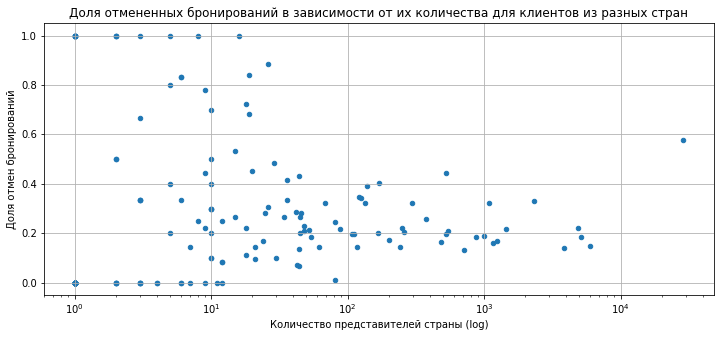

In [9]:
clients_by_country = data_train.pivot_table(index='country', values='is_canceled', aggfunc=['mean', 'count'])
clients_by_country.columns = ['mean', 'count']

ax = clients_by_country.plot(x='count', y='mean', kind='scatter', logx=True, figsize=(12, 5), grid=True)
plt.title('Доля отмененных бронирований в зависимости от их количества для клиентов из разных стран')
plt.xlabel('Количество представителей страны (log)')
plt.ylabel('Доля отмен бронирований')
plt.show()

Для наглядности построили график с логарифмической горизонтальной осью. При анализе графика видим, что доля отмен бронирования для клиентов из стран, представленных более 0.1% от всех значений (65), лежит в интервале от 15 до 40 процентов. Сильно выбивается только наиболее представленная страна (PRT)- граждане этой страны отменяют почти 60% бронирований. В левой же части графика наблюдается большой разброс значений- от 0 до 100% отмен, поэтому целесообразно объединить граждан стран, встречающихся меньше, чем в 0.1% случаев, в категорию 'Other'.

In [10]:
countries = list(data_train['country'].unique())
big_countries = []
for name in countries:
    if data_train[data_train['country'] == name]['country'].count() > 0.001 * len(data_train):
        if name not in big_countries:
            big_countries.append(name)
            
data_train.loc[~data_train['country'].isin(big_countries), 'country'] = 'Other'

data_train['country'].value_counts()

PRT      28831
FRA       5974
GBR       5109
ESP       4900
DEU       3887
ITA       2327
IRL       1445
Other     1436
BEL       1245
NLD       1166
BRA       1088
USA       1008
CHE        874
AUT        716
SWE        544
POL        531
CHN        526
CN         488
ISR        375
RUS        296
NOR        261
ROU        249
FIN        241
DNK        201
TUR        169
AUS        168
AGO        140
LUX        134
MAR        125
HUN        121
JPN        117
CZE        112
ARG        107
IND         88
SRB         81
GRC         81
KOR         68
Name: country, dtype: int64

In [11]:
data_test.loc[~data_test['country'].isin(big_countries), 'country'] = 'Other'

data_test['country'].value_counts()

PRT      9887
GBR      3927
FRA      3477
DEU      2378
ESP      1932
ITA      1153
IRL      1060
BEL       882
BRA       881
Other     793
USA       774
NLD       709
CHE       602
CN        469
AUT       439
CHN       395
SWE       318
ISR       264
NOR       242
POL       239
RUS       217
DNK       182
AUS       161
ROU       158
FIN       143
LUX       103
HUN        83
ARG        78
MAR        71
JPN        68
TUR        64
AGO        63
KOR        60
CZE        44
IND        43
GRC        38
SRB        15
Name: country, dtype: int64

При предварительном анализе заметили, что клиенты, отменяющие бронь, склонны бронировать номера сильно заранее. Построим гистограммы по данным в столбце 'lead_time' в группах клиентов, отменяющих бронирование и заселившихся.

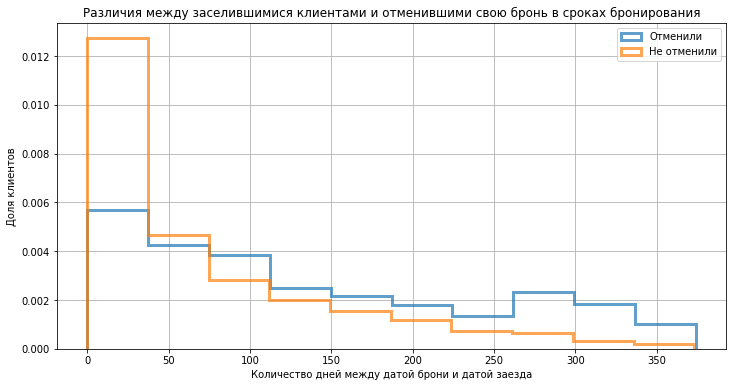

In [12]:
kwargs = {'alpha': 0.7, 'density': True, 'histtype': 'step', 'linewidth': 3}
plt.figure(figsize=(12,6))
plt.hist(data_train[data_train['is_canceled'] == 1]['lead_time'], label='Отменили', **kwargs)
plt.hist(data_train[data_train['is_canceled'] == 0]['lead_time'], label='Не отменили', **kwargs)
plt.legend(loc='upper right')
plt.grid(visible=True)

plt.title('Различия между заселившимися клиентами и отменившими свою бронь в сроках бронирования')
plt.xlabel('Количество дней между датой брони и датой заезда')
plt.ylabel('Доля клиентов')
plt.show()

Здесь видим, что подавляющее большинство заселившихся клиентов производят бронирование менее, чем за 75 дней до даты заезда и очень малая их часть бронирует номер более, чем за 150 дней. Распределение в группе отменивших бронирование носит иной характер- снижение срока бронирования выглядит практически линейным с дополнительным пиком в интервале от 260 до 300 дней, причем после 75 дней доля отменивших бронирование становится больше, чем доля заселившихся, еще раз подтверждая тот факт, что клиенты, отменяющие бронь, склонны бронировать номера заранее. 

Далее определим, влияет ли месяц заселения на отмену брони. Для начала определим, в каком объеме представлены данные в тренировочной выборке.

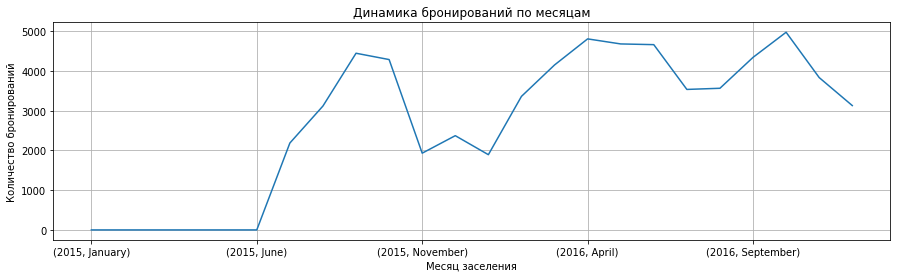

In [13]:
data_train['arrival_date_month'] = data_train['arrival_date_month'].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


data_train.groupby(by=['arrival_date_year', 'arrival_date_month'])['is_canceled'].count().plot(grid=True, figsize=(15, 4))
plt.xlabel('Месяц заселения')
plt.ylabel('Количество бронирований')
plt.title('Динамика бронирований по месяцам')
plt.show()

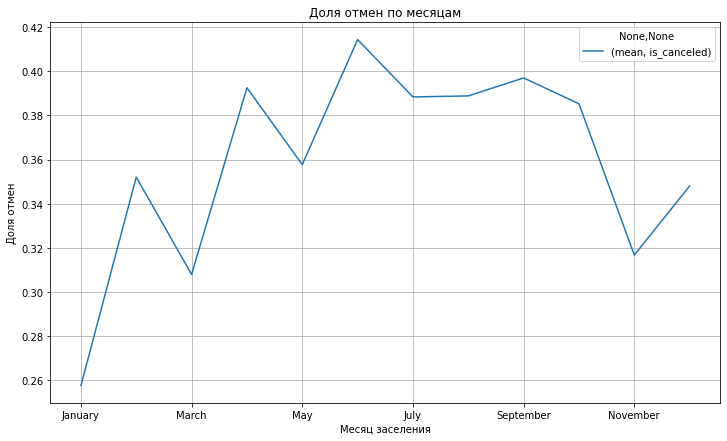

In [14]:
data_train.pivot_table(index='arrival_date_month', values='is_canceled', aggfunc=['mean']).plot(kind='line', figsize=(12, 7), grid=True, title='Доля отмен по месяцам')
plt.xlabel('Месяц заселения')
plt.ylabel('Доля отмен')
plt.show()

Доля отмен бронирования стабильно высокая с апреля по октябрь. 

Отдельно рассмотрим, в каком объеме по месяцам представлены данные в тестовой выборке. Нам предстоит оценить окупаемость системы за один календарный год, а наблюдения в тестовой выборке даны только за 8 месяцев.

In [15]:
data_test.groupby(by='arrival_date_month')['arrival_date_month'].count()

arrival_date_month
April       4878
August      3096
February    3543
January     3150
July        3626
June        4580
March       4277
May         5262
Name: arrival_date_month, dtype: int64

Исходя из анализа, можем предположить, что сеть отелей располагается в южной стране, поэтому для нее характерен наплыв посетителей летом и спад зимой. В таком случае необходимо такде проверить, как распределяются по месяцам заселения длительность бронирования и отмены в зависимости от дней недели. Здесь предполагаем следующее: летом большая часть клиентов бронируют на длительный срок, так как приезжают в отпуск, и чаще заселяются с захватом выходных дней, а зимой клиенты чаще приезжают в деловые поездки, поэтому чаще заселяются в будни. Если предположение верно, мы сможем также оценить, кто чаще отменяет свои бронирования- заселяющиеся в будни или в выходные.

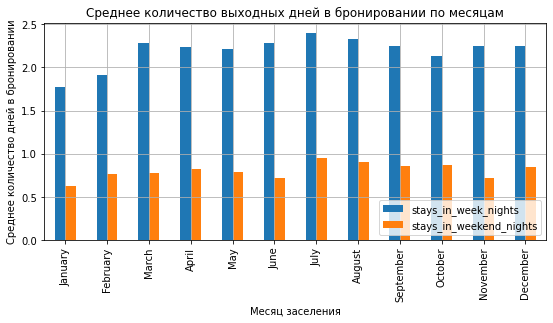

In [16]:
data_train.pivot_table(index='arrival_date_month', values=['stays_in_week_nights', 'stays_in_weekend_nights'], aggfunc='mean').plot(kind='bar', grid=True, figsize=(9,4))
plt.xlabel('Месяц заселения')
plt.ylabel('Среднее количество дней в бронировании')
plt.title('Среднее количество выходных дней в бронировании по месяцам')
plt.legend(loc='lower right')
plt.show()

Видим, что в течение года клиенты производят бронирование на разные сроки- в январе они заселяются на нименьший срок, а в июле- на анибольший. При этом количество будних и выходных дней в бронировании в течение года изменяются практически одинаково.

In [17]:
data_train.pivot_table(index='stays_in_weekend_nights', values='is_canceled', aggfunc='mean')

,is_canceled
stays_in_weekend_nights,
0,0.38
1,0.36
2,0.36
3,0.38
4,0.31


In [18]:
data_train.pivot_table(index='stays_in_week_nights', values='is_canceled', aggfunc='mean')

,is_canceled
stays_in_week_nights,
0,0.28
1,0.33
2,0.45
3,0.35
4,0.35
5,0.33
6,0.36


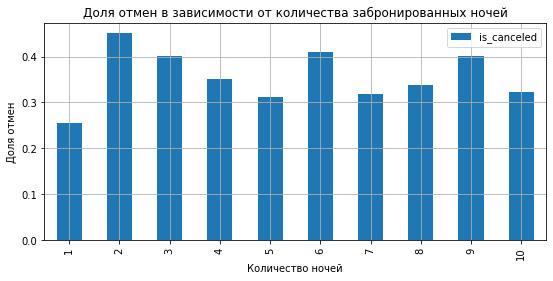

In [19]:
data_train.pivot_table(index='total_nights', values='is_canceled', aggfunc='mean').plot(kind='bar', figsize=(9, 4), grid=True)
plt.title('Доля отмен в зависимости от количества забронированных ночей')
plt.xlabel('Количество ночей')
plt.ylabel('Доля отмен')
plt.show()

Наличие выходных дней в бронировании практически не влияет на отмену, а срок заселения в будни влияет незначительно. Выбиваются из общего ряда только два значения- клиенты, которые не бронируют в будни, и клиенты, которые бронируют на 2 будних дня. Первые отменяют свою бронь реже- в 28% случаев, а вторые, наоборот, чаще- в 45% случаев. 

Доля отмен бронирований также зависит от количества забронированных ночей, но зависимость эта неявна.

Рассмотрев данные в срезе по времени, можем сделать предварительный вывод: время заселения клиента и время бронирования имеют влияние на отмену бронирования. Те клиенты, которые отменяют бронирование, склонны бронировать номер сильно заранее, производят это чаще летом, чем зимой, и по какой-то причине бронируют номер на 2 будних дня.

Далее рассмотрим, влияет ли количество детей на отмену брони. Дополнительно проверим признак, содержищий информацию о количестве младенцев- максимальное значение в нем составляет 10. 

In [20]:
data_train.pivot_table(index='babies', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
babies,,
0.00,0.37,64777
1.00,0.18,447
2.00,0.00,3
9.00,0.00,1
10.00,0.00,1


В данных встречаются две записи с подозрительно большим количеством младенцев в брони- 9 и 10. Если значение 10 можно было бы объяснить тем, что на каком-то из этапов внесения данных к единице случайно приписали ноль, то со значением 9 такого произойти не могло. 

Клиенты с младенцами, бронирующие номер, в два раза реже отменяют бронирование, поэтому данный признак необходимо учесть при обучении модели. Но чтобы избавиться от выбросов и упростить задачу, преобразуем данный столбец в буллево значение- есть ли у клиента младенцы в бронировании.

In [21]:
data_train.loc[data_train['babies'] > 0, 'babies'] = 1
data_train = data_train.rename(columns = {'babies': 'is_babies'})
data_train['is_babies'].value_counts()

0.00    64777
1.00      452
Name: is_babies, dtype: int64

In [22]:
data_test.loc[data_test['babies'] > 0, 'babies'] = 1
data_test = data_test.rename(columns = {'babies': 'is_babies'})
data_test['is_babies'].value_counts()

0.00    32237
1.00      175
Name: is_babies, dtype: int64

Проверим, как влияет количество детей в бронировании на отмену.

In [23]:
data_train.pivot_table(index='children', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
children,,
0.00,0.37,61712
1.00,0.29,2165
2.00,0.37,1336
3.00,0.38,16


Наличие детей в бронировании незначительно влияет на факт его отмены. Немного ниже процент отмен в категории бронирований с одним ребенком, но в бронированиях с двумя и тремя детьми процент отмен такой же, как и в бронированиях без детей.

Также рассмотрим, как влияет количество взрослых в бронировании на долю отмен.

In [24]:
data_train.pivot_table(index='adults', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
adults,,
0.00,0.29,166
1.00,0.30,13212
2.00,0.39,48980
3.00,0.30,2858
4.00,0.08,13


Пары отменяют свои бронирования на 9% чаще, чем клиенты, заселяющиеся одни или втроем. Данных по нулевому значению заселяющихся взрослых и четверых недостаточно для того, чтобы давать однозначную оценку.

Рассмотрим также, как влияет бронирование парковочных мест на отмену бронирования номера. Также рассмотрим, влияет ли количество забронированных мест на вероятность бронирования и при отсутствии влияния объединим любое количество забронированных мет на парковке в буллев тип данных.

In [25]:
data_train.pivot_table(index='required_car_parking_spaces', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
required_car_parking_spaces,,
0,0.39,61547
1,0.00,3670
2,0.00,11
3,0.00,1


Клиенты, которые бронируют парковочное место, практически никогда не отменяют свое бронирование номера. Можно предположить, что в локациях, где представлены отели сети, наблюдаются проблемы как с общественными парковками, так и с парковками в отелях-конкурентах. Данное преимущество можно сделать частью рекламной кампании. Преобразуем данный признак в буллев- бронирует ли клиент парковку в принципе.

In [26]:
data_train.loc[data_train['required_car_parking_spaces'] > 0, 'required_car_parking_spaces'] = 1
data_train = data_train.rename(columns = {'required_car_parking_spaces': 'is_parking'})
data_train['is_parking'].value_counts()

0    61547
1     3682
Name: is_parking, dtype: int64

In [27]:
data_test.loc[data_test['required_car_parking_spaces'] > 0, 'required_car_parking_spaces'] = 1
data_test = data_test.rename(columns = {'required_car_parking_spaces': 'is_parking'})
data_test['is_parking'].value_counts()

0    30935
1     1477
Name: is_parking, dtype: int64

Рассмотрим, как распределяются доли отмен в зависимости от предыдущих отмененных и неотмененных бронирований.

In [28]:
data_train.pivot_table(index='previous_cancellations', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
previous_cancellations,,
0,0.31,59591
1,0.97,5367
2,0.43,54
3,0.31,51
4,0.20,5
5,0.15,13
6,1.00,7
11,0.29,35


Здесь видим, что, за редким исключением, доля повторных отмен приближается к единице, поэтому преобразуем данный признак в бинарный.

In [29]:
data_train.loc[data_train['previous_cancellations'] > 0, 'previous_cancellations'] = 1
data_train = data_train.rename(columns = {'previous_cancellations': 'is_cancelations'})
data_train['is_cancelations'].value_counts()

0    59591
1     5638
Name: is_cancelations, dtype: int64

In [30]:
data_test.loc[data_test['previous_cancellations'] > 0, 'previous_cancellations'] = 1
data_test = data_test.rename(columns = {'previous_cancellations': 'is_cancelations'})
data_test['is_cancelations'].value_counts()

0    32186
1      226
Name: is_cancelations, dtype: int64

In [31]:
data_train.pivot_table(index='previous_bookings_not_canceled', values='is_canceled', aggfunc=['mean', 'count']).head(10)

,mean,count
,is_canceled,is_canceled
previous_bookings_not_canceled,,
0,0.38,63686
1,0.05,645
2,0.05,252
3,0.07,136
4,0.07,114
5,0.08,89
6,0.05,56
7,0.00,34


Здесь видим: если клиент не отменил свое бронирование в прошлый раз, то с вероятностью около 95% он не отменит его и при дальнейших бронированиях. Для простоты также преобразуем данный признак в бинарный.

In [32]:
data_train.loc[data_train['previous_bookings_not_canceled'] > 0, 'previous_bookings_not_canceled'] = 1
data_train = data_train.rename(columns = {'previous_bookings_not_canceled': 'is_not_canceled'})
data_train['is_not_canceled'].value_counts()

0    63686
1     1543
Name: is_not_canceled, dtype: int64

In [33]:
data_test.loc[data_test['previous_bookings_not_canceled'] > 0, 'previous_bookings_not_canceled'] = 1
data_test = data_test.rename(columns = {'previous_bookings_not_canceled': 'is_not_canceled'})
data_test['is_not_canceled'].value_counts()

0    31362
1     1050
Name: is_not_canceled, dtype: int64

В заключении отобразим типы данных в признаках и при необходимости преобразуем их.

In [34]:
data_train.dtypes

id                              int64
is_canceled                     int64
lead_time                     float64
arrival_date_year               int64
arrival_date_month           category
arrival_date_week_number        int64
arrival_date_day_of_month       int64
stays_in_weekend_nights         int64
stays_in_week_nights            int64
adults                        float64
children                      float64
is_babies                     float64
meal                           object
country                        object
distribution_channel           object
is_repeated_guest               int64
is_cancelations                 int64
is_not_canceled                 int64
reserved_room_type             object
booking_changes                 int64
days_in_waiting_list            int64
customer_type                  object
is_parking                      int64
total_of_special_requests       int64
total_nights                    int64
dtype: object

In [35]:
for name in ['lead_time', 'adults', 'children', 'is_babies']:
    data_train[name] = data_train[name].astype('int')
data_train.dtypes

id                              int64
is_canceled                     int64
lead_time                       int32
arrival_date_year               int64
arrival_date_month           category
arrival_date_week_number        int64
arrival_date_day_of_month       int64
stays_in_weekend_nights         int64
stays_in_week_nights            int64
adults                          int32
children                        int32
is_babies                       int32
meal                           object
country                        object
distribution_channel           object
is_repeated_guest               int64
is_cancelations                 int64
is_not_canceled                 int64
reserved_room_type             object
booking_changes                 int64
days_in_waiting_list            int64
customer_type                  object
is_parking                      int64
total_of_special_requests       int64
total_nights                    int64
dtype: object

In [36]:
data_test.dtypes

id                             int64
is_canceled                    int64
lead_time                    float64
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
adults                       float64
children                     float64
is_babies                    float64
meal                          object
country                       object
distribution_channel          object
is_repeated_guest              int64
is_cancelations                int64
is_not_canceled                int64
reserved_room_type            object
booking_changes                int64
days_in_waiting_list           int64
customer_type                 object
is_parking                     int64
total_of_special_requests      int64
total_nights                   int64
dtype: object

In [37]:
for name in ['lead_time', 'adults', 'children', 'is_babies']:
    data_test[name] = data_test[name].astype('int')
data_test.dtypes

id                            int64
is_canceled                   int64
lead_time                     int32
arrival_date_year             int64
arrival_date_month           object
arrival_date_week_number      int64
arrival_date_day_of_month     int64
stays_in_weekend_nights       int64
stays_in_week_nights          int64
adults                        int32
children                      int32
is_babies                     int32
meal                         object
country                      object
distribution_channel         object
is_repeated_guest             int64
is_cancelations               int64
is_not_canceled               int64
reserved_room_type           object
booking_changes               int64
days_in_waiting_list          int64
customer_type                object
is_parking                    int64
total_of_special_requests     int64
total_nights                  int64
dtype: object

### Вывод

По результатам аналитического анализа данных можем сделать следующие выводы:

1. В представленных данных нет пропусков и дубликатов. Были обнаружены единичные выбросы, от которых избавились путем преобразования данных в столбцах.

2. Предварительно можем составить портрет клиента, который с большой вероятностью отменит бронирование- это клиент, который бронирует заранее (более, чем за месяц до заселения), не бронирует парковку, в его истории уже были отмены брони, он реже вносит изменения в бронирование, реже берет с собой младенцев и чаще бронирует номер на 2 ночи.

3. Отдельно стоит отметить, что клиенты, бронирующие парковку, практически никогда не отменяют свое бронирование. Судя по всему, в локациях, где представлены отели сети, есть проблемы с парковкой, поэтому наличие собственного паркинга у отелей следует использовать как преимущество при проведении рекламных кампаний.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

В данном разделе сформулируем задачу машинного обучения на основе бизнес задачи, а также напишем функции для расчета прибыли сети отелей, чтобы оценить, окупится ли создание системы отслеживания ненадежных клиентов.

Наша задача- создать систему отслеживания ненадежных клиентов, позволяющую предсказать отмену ими бронирования и при положительном ответе вводящая аванс в размере 80% от стоимости номера за одни сутки. Успешность внедрения системы определяется ее окупаемостью- необходимо, чтобы система, в которую будет вложено 400 тыс. рублей, окупилась за один календарный год. Здесь мы сталкиваемся с первой проблемой- в тестовой выборке данны наблюдения только за 8 месяцев, поэтому нам придется определить среднюю прибыль за месяц и экстраполировать ее на год.

Задачей машинного обучения в данном случае будет обучение модели с наибольшим значением F1-меры на тренировочной выборке с целевым признаком- отменой бронирования. F1- мера позволит сравнить модели и подобрать оптимальные гиперпараметры. При близких значениях F1-меры будет дополнительно сравнивать полноту (recall) модели, чтобы оценить, как много отмен бронирования она нашла. Прибыль от внедрения модели будем оценивать следующим образом- предскажем результаты отмены бронирования и для тех клиентов, которых модель угадала, посчитаем прибыль.

Назначим константы в отдельном окне- стоимость номера и стоимость уборки в нем:
* категория A: за ночь — 1 000, разовое обслуживание — 400;
* категория B: за ночь — 800, разовое обслуживание — 350;
* категория C: за ночь — 600, разовое обслуживание — 350;
* категория D: за ночь — 550, разовое обслуживание — 150;
* категория E: за ночь — 500, разовое обслуживание — 150;
* категория F: за ночь — 450, разовое обслуживание — 150;
* категория G: за ночь — 350, разовое обслуживание — 150.

In [38]:
# напишем функцию для удаления пробелов из строк с указанием типа номера
def spaces_remover(row):
    return row['reserved_room_type'].strip()
data_train['reserved_room_type'] = data_train.apply(spaces_remover, axis=1)

In [39]:
# напишем функцию, возвращающую стоимость номера в зависимости от его типа
def night_cost(row):
    if row['reserved_room_type'] == 'A':
        return 1000
    elif row['reserved_room_type'] == 'B':
        return 800
    elif row['reserved_room_type'] == 'C':
        return 600
    elif row['reserved_room_type'] == 'D':
        return 550
    elif row['reserved_room_type'] == 'E':
        return 500
    elif row['reserved_room_type'] == 'F':
        return 450
    else:
        return 350

# напишем функцию, возвращающую стоимость уборки в номере в зависимости от типа
def cleaning_cost(row):
    if row['reserved_room_type'] == 'A':
        return 400
    elif row['reserved_room_type'] in ['B', 'C']:
        return 350
    else:
        return 150
        
data_train['night_cost'] = data_train.apply(night_cost, axis=1)  
data_train['cleaning_cost'] = data_train.apply(cleaning_cost, axis=1)

In [40]:
# функция для расчета прибыли
def profit(row):
    if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
        if row['is_canceled'] == 0:
            return 1.2 *(row['night_cost'] * row['total_nights'] - np.ceil(row['total_nights'] / 2) * row['cleaning_cost'])
        else:
            return 0 - 1.2 * (row['night_cost'] + row['cleaning_cost'])
    if row['arrival_date_month'] in ['June', 'July', 'August']:
        if row['is_canceled'] == 0:
            return 1.4 *(row['night_cost'] * row['total_nights'] - np.ceil(row['total_nights'] / 2) * row['cleaning_cost'])
        else:
            return 0 - 1.4 * (row['night_cost'] + row['cleaning_cost'])
    else:
        if row['is_canceled'] == 0:
            return row['night_cost'] * row['total_nights'] - np.ceil(row['total_nights'] / 2) * row['cleaning_cost']
        else:
            return 0 - (row['night_cost'] + row['cleaning_cost'])

data_train['profit'] = data_train.apply(profit, axis=1)

In [41]:
# вычислим в отдельном столбце сумму штрафа
data_train['penalty'] = data_train['night_cost'] * 0.8

In [42]:
data_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,days_in_waiting_list,customer_type,is_parking,total_of_special_requests,total_nights,night_cost,cleaning_cost,profit,penalty
0,0,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,0,0,1,1000,400,840.00,800.00
1,1,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,0,1,2,1000,400,"2,240.00",800.00
2,2,0,0,2015,July,27,1,0,2,2,...,0,0,Transient,0,0,2,600,350,"1,190.00",480.00
3,3,0,9,2015,July,27,1,0,2,2,...,0,0,Transient,0,1,2,600,350,"1,190.00",480.00
4,4,1,85,2015,July,27,1,0,3,2,...,0,0,Transient,0,1,3,1000,400,"-1,960.00",800.00


In [43]:
# применим все то же самое к тестовой выборке
data_test['reserved_room_type'] = data_test.apply(spaces_remover, axis=1)
data_test['night_cost'] = data_test.apply(night_cost, axis=1)  
data_test['cleaning_cost'] = data_test.apply(cleaning_cost, axis=1)
data_test['profit'] = data_test.apply(profit, axis=1)
data_test['penalty'] = data_test['night_cost'] * 0.8

data_test.sample(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,days_in_waiting_list,customer_type,is_parking,total_of_special_requests,total_nights,night_cost,cleaning_cost,profit,penalty
21460,86952,0,13,2017,March,10,5,2,1,2,...,0,0,Transient,0,0,3,550,150,"1,620.00",440.00
9474,46663,1,15,2017,February,9,28,0,4,2,...,0,0,Transient,0,0,4,1000,400,"-1,400.00",800.00
10744,47933,1,73,2017,April,14,3,1,3,2,...,0,0,Transient,0,0,4,1000,400,"-1,680.00",800.00
13447,50636,1,210,2017,May,20,15,1,3,2,...,0,0,Transient,0,3,4,1000,400,"-1,680.00",800.00
32408,97900,0,21,2017,August,35,30,2,5,2,...,0,0,Transient,0,2,7,1000,400,"7,560.00",800.00


Подготовим данные к обучению. Разделим обучающие признаки и целевой признак, масштабируем количественные данные и обработаем категориальные признаки методикой OHE.

### Шаг 4. Разработка модели ML

In [44]:
# выделим целевой признак
target_train = data_train['is_canceled']
target_test = data_test['is_canceled']

# выделим обучаюшие признаки
features_train = data_train.drop(['id', 'is_canceled', 'arrival_date_week_number', 'arrival_date_year', 'night_cost', 'cleaning_cost', 'profit', 'penalty'], axis=1)
features_test = data_test.drop(['id', 'is_canceled', 'arrival_date_week_number', 'arrival_date_year', 'night_cost', 'cleaning_cost', 'profit', 'penalty'], axis=1)

# выделим типы признаков- количественные и категориальные
categorial = ['arrival_date_month', 'is_babies', 'country', 'distribution_channel', 'is_repeated_guest', 'is_cancelations', 'is_not_canceled', 'reserved_room_type', 'meal', 'customer_type', 'is_parking']
numeric = [feature for feature in list(features_train.columns) if feature not in categorial]

# обработаем категориальные признаки методом One Hot Encoding
enc = OneHotEncoder(drop='first')
encoded_train = pd.DataFrame(enc.fit_transform(features_train[categorial]).toarray())
encoded_test = pd.DataFrame(enc.transform(features_test[categorial]).toarray())

# масштабируем количественные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
scaled_train = pd.DataFrame(scaler.transform(features_train[numeric])) 
scaled_test = pd.DataFrame(scaler.transform(features_test[numeric]))

# объединим признаки в обучающую и тестовую выборки
ohe_sc_train = scaled_train.join(encoded_train, lsuffix='_scaled')
ohe_sc_test = scaled_test.join(encoded_test, lsuffix='_scaled')

print(ohe_sc_train.shape, ohe_sc_test.shape)

(65229, 78) (32412, 78)


In [45]:
# обучим модель логистической регрессии
lr_model = LogisticRegression(max_iter=1000, random_state=12345)
lr_model.fit(ohe_sc_train, target_train)
score = cross_val_score(lr_model, ohe_sc_train, target_train, cv=10)


lr_score = pd.Series(score).mean()
print(f'Точность модели логистической регрессии при кросс-валидации равна {lr_score: 0.1%}')

Точность модели логистической регрессии при кросс-валидации равна  70.5%


In [46]:
# обучим модель решающего дерева с перебором гиперпараметра- глубины дерева
for depth in (1, len(ohe_sc_train.columns)):
    best_result = 0
    dtc_model = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    dtc_model.fit(ohe_sc_train, target_train)
    score = cross_val_score(dtc_model, ohe_sc_train, target_train, cv=10)
    result = pd.Series(score).mean()
    if result > best_result:
        best_result = result
        best_dtc_model = dtc_model
        best_depth = depth
print(f'Точность модели решающего дерева при кросс-валидации равна {best_result: 0.1%}, глубина дерева- {best_depth}')

Точность модели решающего дерева при кросс-валидации равна  62.8%, глубина дерева- 78


In [47]:
# обучим модель Ada Boost
from sklearn.ensemble import AdaBoostClassifier
abc_model = AdaBoostClassifier(n_estimators=100, random_state=12345)
abc_model.fit(ohe_sc_train, target_train)
score = cross_val_score(abc_model, ohe_sc_train, target_train, cv=10)
scores = pd.Series(score).mean()
scores
print(f'Точность модели AdaBoost при кросс-валидации равна {scores: 0.1%}')

Точность модели AdaBoost при кросс-валидации равна  72.6%


In [48]:
# выделим столбец с предсказаниями лучшей модели- Ada Boost
predictions = abc_model.predict(ohe_sc_test)
data_test['predictions'] = pd.Series(predictions)
print(f"Точность модели AdaBoost на тестовой выборке равна {accuracy_score(data_test['is_canceled'], data_test['predictions']): 0.1%}")


Точность модели AdaBoost на тестовой выборке равна  77.1%


In [49]:
# создадим столбец с вычисленной предсказанной прибылью
def prediction_profit(row):
    if row['is_canceled'] == 1 and row['predictions'] == 1:
        return row['penalty']
    else:
        return row['profit']
    
data_test['prediction_profit'] = data_test.apply(prediction_profit, axis=1)


In [50]:
Clients = len(data_test)

In [52]:
# напишем функцию, вычисляющую среднюю прибыль от внедрения системы прогнозирования и 95% доверительный интервал 
# техникой бутстрэп

def profit_risk(data):
    calculations = []
    for i in range(1000):
        subsample = data_test.sample(n=Clients, replace=True)
        calculations.append(subsample['prediction_profit'].sum() - subsample['profit'].sum())
    calculations = pd.Series(calculations)
    conf_interval = st.t.interval(0.95, len(calculations)-1, calculations.mean(), calculations.sem())
    print('95%-ый доверительный интервал', conf_interval)
    print(f'Средняя прибыль {calculations.mean(): .2f} рублей')
    print(f'Риск убытков составляет {len(calculations[calculations<0]) / len(calculations): .1%}')

profit_risk(data_test)

95%-ый доверительный интервал (16198539.634813776, 16220201.565186223)
Средняя прибыль  16209370.60 рублей
Риск убытков составляет  0.0%


### Вывод

Наилучшие предсказания показала модель AdaBoost- 73% на обучающей выборке и 77%- на тестовой. При применении модели AdaBoost предсказанный прирост прибыли от внедрения системы прогнозирования составит больше 16 миллионов рублей.

### Шаг 5. Опишите портрет «ненадёжного» клиента

На основе анализа данных можем сделать вывод, что "ненадежные" клиенты чаще всего бронируют номер сильно заранее- более, чем за месяц до заселения, никогда не бронируют парковку для автомобиля, в их истории уже были отмены брони, они реже вносят изменения в бронирования, реже берут с собой младенцев и чаще бронируут номер на 2 ночи.

### Шаг 6. Напишите общий вывод

На основе выполненного проекта можем сделать вывод, что внедрение системы прогнозирования принесет значительную дополнительную прибыль сети отелей. Наилучшей моделью для прогнозирования отказа клиента от брони при этом будет AdaBoostClassifier. 